<a href="https://colab.research.google.com/github/Python-Charmer/Final-Project-Team-Python-Charmer/blob/master/Phase2/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project - Team Python Charmers


In [0]:
# Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [0]:
# Loading Data From Source.
def load_data():
  url = r'https://raw.githubusercontent.com/Python-Charmer/Final-Project-Team-Python-Charmer/master/Phase1/Data/BreastCancerWisconsin.csv'
  df = pd.read_csv(url)
  names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
  df.columns = names
  return df

In [0]:
# Understanding Missing Values
def clean_missing(df):
  df['A7'] = df['A7'].replace('?',np.NaN)
  df['A7'] = pd.to_numeric(df['A7'])
  print("Below are how many missing values for each column\n")
  print(df.isnull().sum())
  print("\nCleaning missing values with column means\n")
  df = df.fillna(round(df.mean(skipna = True),2))
  print(df.isnull().sum())
  return df
  

In [0]:
# Calculating Summary Metrics
def  sum_metrics(df):
  print("\n Below are the summary metrics of the data \n" + str(df.describe()))
  print ("\n\nThere are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " Columns in this data frame")
  print("\nThere are " + str(len(df['Scn'].unique())) + " unique scn values in the dataset.\n")
  print("Below are the duplicate rows in the dataset.\n")
  print(str(df.loc[df.duplicated(), :]) + "\n")

In [0]:
# Plotting graphs
def plot_graphs(df):
  print("\nBelow are the histograms of A2:A10 \n")
  df.iloc[:,1:10].hist(bins = 8, color="blue", grid="False",alpha = .5, figsize=(12,6))
  plt.tight_layout(rect=(0,0,1.2,1.2))
  plt.show()
  df['Class'].value_counts().plot.bar().set_title("Class Variable: 2 = Benign 4 = Malignant")
  df.plot.scatter(x='A3', y='A4').set_title("Scatter of A3 & A4 90% corr")


In [59]:
# Main Function
df = load_data()
df = clean_missing(df)
#sum_metrics(df)
#plot_graphs(df)

Below are how many missing values for each column

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

Cleaning missing values with column means

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
Class    0
dtype: int64


In [41]:
print("The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.")

The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.


In [0]:
#Use KMeans algorithm (do not use column CLASS) 10pts
#Find the optimal number of clusters 10 pts
#Revise data variation 10pts
#Implement normalization 8pts
#Update your github code 2pts

In [202]:
X  = df.drop(['Scn','Class'], axis  = 1)
y = df['Class']

clss = KMeans(n_clusters = 4) 
clss.fit(X)
cent = clss.cluster_centers_
pd.DataFrame(cent ,columns  = X.columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,2.944934,1.244493,1.365639,1.292952,2.039648,1.351278,2.061674,1.200441,1.077093
1,7.464789,7.028169,6.676056,4.197183,5.535211,3.452958,5.380282,6.816901,2.309859
2,7.234043,4.851064,5.042553,4.861702,4.117021,9.382979,5.265957,3.787234,1.648936
3,6.762500,8.387500,8.425000,7.750000,6.775000,9.212500,7.375000,7.737500,3.787500


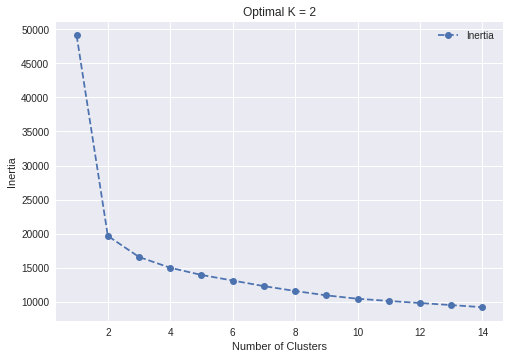

In [206]:

def find_optimal_K(X,y):
  inertia = []
  k = []
  for i in range(1,15):
    clss = KMeans(n_clusters = i) 
    clss.fit(X)
    iner = clss.inertia_
    k.append(i)
    inertia.append(iner)
  res  = pd.concat([pd.DataFrame(k), pd.DataFrame(inertia)],axis = 1)
  res.columns = ['K','Inertia']
  ax = res.plot("K",marker='o', linestyle='dashed', title = "Optimal K = 2" )
  ax.set_xlabel("Number of Clusters")
  ax.set_ylabel("Inertia")
  
 
find_optimal_K(X,y)

Text(0.5,1,'STD Of Factors')

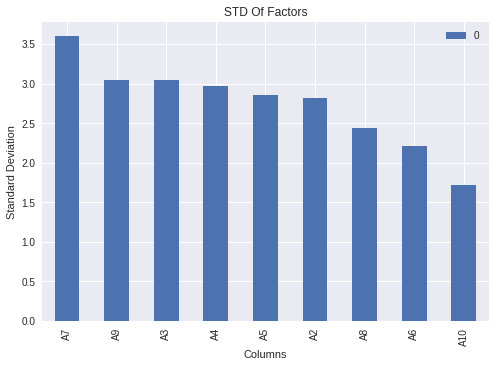

In [232]:

st = pd.DataFrame(X.std()).sort_values(by = 0, ascending = False)
x = st.plot(kind = 'bar')
x.set_xticklabels(st.index)
x.set_xlabel("Columns")
x.set_ylabel("Standard Deviation")
x.set_title("STD Of Factors")

In [247]:
mdl = make_pipeline(StandardScaler(), KMeans(n_clusters = 2, n_init=20))
mdl.fit(X)
centers = pd.DataFrame(mdl.named_steps['kmeans'].cluster_centers_)
centers.columns = X.columns
centers



,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0.986083,1.20602,1.196465,1.023233,1.012892,1.153765,1.088383,1.054751,0.603622
1,-0.496223,-0.60690,-0.602092,-0.514917,-0.509713,-0.580604,-0.547702,-0.530778,-0.303758
